# Lecture 11

October 15, 2024

**Reference for prior lectures:**

The book [*Sage for Undergraduates* by Gregory V. Bard](http://gregorybard.com/Sage.html) has some good information on drawing graphs and graphics, and also has some good suggestions on how to design interactive graphics with `@interact`. One pitfall is that the book is written for earlier versions of SageMath. In particular, at the time Sage was built off of Python 2 rather than Python 3 and some of the syntax has changed. (For example, you used to be able to write `print "Hi!"` to print a string, and now you must write `print("Hi!")`.)

**Main reference for this lecture:**

* **CM:** Computational Mathematics with SageMath, mostly section 2.4

## Problem 2 from last class

This problem was covered very quickly at the end of class last time. Here I rephrase the problem a bit and solve it more carefully, in a way that I can recommend for you to approach problems.

Five points in the plane determine a *quadric curve* passing through them, the zero set of a degree two polynomial equation of the form
$$a x^2 + b xy+ c x + dy^2 + e y + f = 0,$$
with $a$, $b$, $c$, $d$, $e$, and $f$ constants.

Find this curve and plot it together with the $5$ points. Make it interactive.

We will use an `input_grid` to get the points. We'll use columns for our points (otherwise it would take up $5$ rows).

In [1]:
points = input_grid(2, 5, 
                    default=[ [1,8,3,9,5],
                              [4,8,6,2,2]], label='points')
points

Grid(value=[[1, 8, 3, 9, 5], [4, 8, 6, 2, 2]], children=(Label(value='points'), VBox(children=(EvalText(value='1', layout=Layout(max_width='5em')), EvalText(value='4', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='8', layout=Layout(max_width='5em')), EvalText(value='8', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='3', layout=Layout(max_width='5em')), EvalText(value='6', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='9', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='5', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em'))))))

When the data is passed to our function through `@interact` we will be given the following type of value:

In [2]:
points = points.get_value()
points

[[1, 8, 3, 9, 5], [4, 8, 6, 2, 2]]

This is a list of five $x$-coordinates followed by a list of five $y$-coordinates. Let us organize the points into five points.

In [3]:
pts = []
for i in range(5):
    pt = (points[0][i], points[1][i])
    pts.append(pt)
pts

[(1, 4), (8, 8), (3, 6), (9, 2), (5, 2)]

We plot the points below. (We set `zorder=10` so it appears on top.)

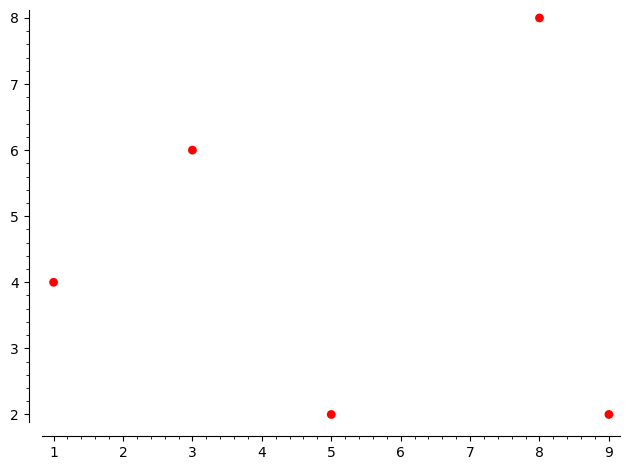

In [4]:
plt1 = point(pts, color='red',zorder=10, size=40)
plt1

Now let us define a general version of the quadratic polynomial.

In [5]:
a,b,c,d,e,f = var('a b c d e f')
Q(x,y) = a*x^2 + b*x*y + c*x + d*y^2 + e*y + f
Q

(x, y) |--> a*x^2 + b*x*y + d*y^2 + c*x + e*y + f

We get an equation that must hold from each point:

In [6]:
eqns = [Q(*pts[i])==0 for i in range(5)]
eqns

[a + 4*b + c + 16*d + 4*e + f == 0,
 64*a + 64*b + 8*c + 64*d + 8*e + f == 0,
 9*a + 18*b + 3*c + 36*d + 6*e + f == 0,
 81*a + 18*b + 9*c + 4*d + 2*e + f == 0,
 25*a + 10*b + 5*c + 4*d + 2*e + f == 0]

Observe that this is a homogeneous system of $5$ linear equations in $6$ variables. Therefore, there is at least a $1=6-5$-dimensional solution set, which is a linear subspace of $\mathbb R^6$.

We can solve the system:

In [7]:
solutions = solve(eqns,[a,b,c,d,e,f], solution_dict=True)
solutions

[{a: 1/148*r1,
  b: -19/888*r1,
  c: -23/444*r1,
  d: 29/444*r1,
  e: -425/888*r1,
  f: r1}]

We see there is only one solution family, which has a single free variable. We extract the single solution:

In [8]:
sol = solutions[0]

We can extract the variables in a symbolic expression with the `.variables()` method. For example:

In [9]:
sol[a].variables()

(r1,)

The following will extract all the variables and place them in a set:

In [10]:
free_variables = set()
for variable, expression in sol.items():
    free_variables = free_variables.union(expression.variables())
free_variables

{r1}

We want one solution, so we will choose values for these free variables. We don't want to choose zero, or else all our values will be zero. The choice of one for all values should be okay. Here is a dictionary that represents this choice:

In [11]:
free_variable_values = {variable:1 for variable in free_variables}
free_variable_values

{r1: 1}

Now let's build a new solution dictionary that substutes these free variables.

In [12]:
new_sol = {}
for variable, expression in sol.items():
    new_expression = expression.subs(free_variable_values)
    new_sol[variable] = new_expression
new_sol

{a: 1/148, b: -19/888, c: -23/444, d: 29/444, e: -425/888, f: 1}

Great. Now we have an actual function to graph the zero set of:

In [13]:
Q_new = Q.subs(new_sol)
Q_new

(x, y) |--> 1/148*x^2 - 19/888*x*y + 29/444*y^2 - 23/444*x - 425/888*y + 1

To plot it, we can try a contour plot:

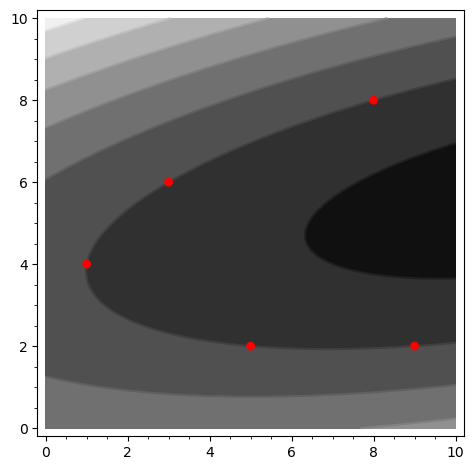

In [14]:
contour_plot(Q_new, (x, 0, 10), (y, 0, 10)) + plt1

We are hoping to draw just the zero set. We can use `contour_plot` but it requires some customization. We read the documentation (`contour_plot?`) and after some experimentation settle on the following:

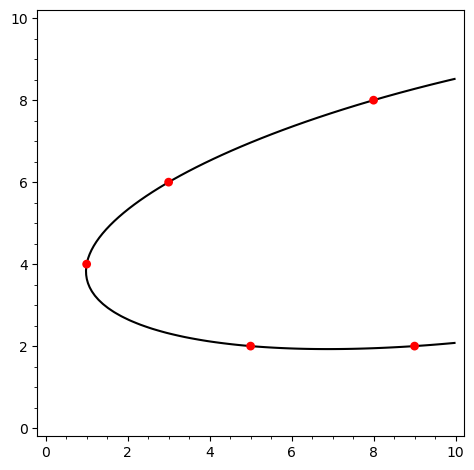

In [15]:
contour_plot(Q_new, (x, 0, 10), (y, 0, 10), fill=False, contours=[0]) + plt1

We now assemble the above into an interactive plot:

In [16]:
@interact
def plot_curve(points = input_grid(2, 5, 
                                   default=[ [1,8,3,9,5],
                                             [4,8,6,2,2]], label='points')):
    pts = []
    for i in range(5):
        pt = (points[0][i], points[1][i])
        pts.append(pt)
    pts

    # We plot the points below. (We set `zorder=10` so it appears on top.)
    plt1 = point(pts, color='red',zorder=10, size=40)

    # Now let us define a general version of the quadratic polynomial.
    a,b,c,d,e,f = var('a b c d e f')
    Q(x,y) = a*x^2 + b*x*y + c*x + d*y^2 + e*y + f

    # We get an equation that must hold from each point:
    eqns = [Q(*pts[i])==0 for i in range(5)]
    # We can solve the system:
    solutions = solve(eqns,[a,b,c,d,e,f], solution_dict=True)
    sol = solutions[0]
    # The following will extract all the variables and place them in a set:
    free_variables = set()
    for variable, expression in sol.items():
        free_variables = free_variables.union(expression.variables())
    free_variables

    # We want one solution, so we will choose values for these free variables.
    free_variable_values = {variable:1 for variable in free_variables}
    # Now let's build a new solution dictionary that substutes these free variables.
    new_sol = {}
    for variable, expression in sol.items():
        new_expression = expression.subs(free_variable_values)
        new_sol[variable] = new_expression
    new_sol

    # Great. Now we have an actual function to graph the zero set of:
    Q_new = Q.subs(new_sol)
    # We plot the zero contour below:
    plt2 = contour_plot(Q_new, (x, 0, 10), (y, 0, 10), fill=False, contours=[0])

    # Return the combined plot
    return plt1 + plt2

Interactive function <function plot_curve at 0x7fa9bbab18a0> with 1 widget
  points: Grid(value=[[1, 8, 3, 9, 5], [4, 8, 6, 2, 2]], children=(Label(value='points'), VBox(children=(EvalText(value='1', layout=Layout(max_width='5em')), EvalText(value='4', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='8', layout=Layout(max_width='5em')), EvalText(value='8', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='3', layout=Layout(max_width='5em')), EvalText(value='6', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='9', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='5', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em'))))))

## Linear Algebra

First, we can do a bit of linear algebra without knowing too much:

### Example: Least squares

For integers $d \geq 0$, find the polynomial $p(x)$ of degree at most 5 that minimizes the following integral:
$$\int_{-1}^{1}|e^x - p(x)|^{2}dx.$$

Create an interact that graphs the function $x \mapsto e^x$ over $[-1, 1]$ together with the best polynomial of degree $d$ over this interval. Your answer should be exact.

In [17]:
d = 6 # The degree, obtained from the argument of the interact.

In [18]:
c = [var(f"c{i}") for i in range(d+1)]
print(c)

[c0, c1, c2, c3, c4, c5, c6]


In [19]:
x = var('x')
p(x) = sum(c[i]*x^i for i in range(d+1))
p

x |--> c6*x^6 + c5*x^5 + c4*x^4 + c3*x^3 + c2*x^2 + c1*x + c0

In [20]:
# Gotcha: In the above problem, we changed the value of e!
e = exp(1)
e.n()

2.71828182845905

In [21]:
square_of_difference = (e^x - p(x))^2
square_of_difference.expand()

c6^2*x^12 + 2*c5*c6*x^11 + c5^2*x^10 + 2*c4*c6*x^10 + 2*c4*c5*x^9 + 2*c3*c6*x^9 + c4^2*x^8 + 2*c3*c5*x^8 + 2*c2*c6*x^8 + 2*c3*c4*x^7 + 2*c2*c5*x^7 + 2*c1*c6*x^7 + c3^2*x^6 + 2*c2*c4*x^6 + 2*c1*c5*x^6 + 2*c0*c6*x^6 - 2*c6*x^6*e^x + 2*c2*c3*x^5 + 2*c1*c4*x^5 + 2*c0*c5*x^5 - 2*c5*x^5*e^x + c2^2*x^4 + 2*c1*c3*x^4 + 2*c0*c4*x^4 - 2*c4*x^4*e^x + 2*c1*c2*x^3 + 2*c0*c3*x^3 - 2*c3*x^3*e^x + c1^2*x^2 + 2*c0*c2*x^2 - 2*c2*x^2*e^x + 2*c0*c1*x - 2*c1*x*e^x + c0^2 - 2*c0*e^x + e^(2*x)

#### Integration:

There are multiple notations for performing symbolic integration in SageMath. If `f` is a sage function, the documentation seems to encourage `f.integral()` to compute a symbolic integral. Calling `f.integral(x)` seems safer as it specifies the variable being integrated with respect to. For definite integrals, `f.integral(x, a, b)` gives the definite integral of $f$ over the interval $[a, b]$. One source of help with this is `integrate?`.

There is also a function `numerical_integral` which integrates a function numerically (allowing you to select one of many algorithms to approximate an integral by evaluating the function numerically at finitely many points. Check `numerical_integral?` for more information.

Section 2.3.8 of the book Computational Mathematics with SageMath addresses these sort of integration techniques. 

Since we want an exact solution, we should not use numerical integration. We integrate `square_of_difference` over $[-1, 1]$ below.

In [22]:
value = square_of_difference.integral(x, -1, 1)
show(value.expand())

2*c0^2 + 2/3*c1^2 + 4/3*c0*c2 + 2/5*c2^2 + 4/5*c1*c3 + 2/7*c3^2 + 4/5*c0*c4 + 4/7*c2*c4 + 2/9*c4^2 + 4/7*c1*c5 + 4/9*c3*c5 + 2/11*c5^2 + 4/7*c0*c6 + 4/9*c2*c6 + 4/11*c4*c6 + 2/13*c6^2 - 2*c0*e - 2*c2*e + 4*c3*e - 18*c4*e + 88*c5*e - 530*c6*e + 2*c0*e^(-1) - 4*c1*e^(-1) + 10*c2*e^(-1) - 32*c3*e^(-1) + 130*c4*e^(-1) - 652*c5*e^(-1) + 3914*c6*e^(-1) + 1/2*e^2 - 1/2*e^(-2)

Observe this is a degree two polynomial in the coefficients. The minimum will be obtained at a point where the partial derivatives are all zero. The partials are obtained as follows:

In [23]:
value.derivative(c[0])

1/210*(420*c0*e^2 - 210*c1*e^2 + 140*c2*e^2 - 105*c3*e^2 + 84*c4*e^2 - 70*c5*e^2 + 60*c6*e^2 + 420*e)*e^(-2) + 2*c0 + c1 + 2/3*c2 + 1/2*c3 + 2/5*c4 + 1/3*c5 + 2/7*c6 - 2*e

Here we write down the equations set each partial equal to zero.

In [24]:
equations = [value.derivative(c[i]) == 0 for i in range(d+1)]
equations

[1/210*(420*c0*e^2 - 210*c1*e^2 + 140*c2*e^2 - 105*c3*e^2 + 84*c4*e^2 - 70*c5*e^2 + 60*c6*e^2 + 420*e)*e^(-2) + 2*c0 + c1 + 2/3*c2 + 1/2*c3 + 2/5*c4 + 1/3*c5 + 2/7*c6 - 2*e == 0,
 -1/420*(420*c0*e^2 - 280*c1*e^2 + 210*c2*e^2 - 168*c3*e^2 + 140*c4*e^2 - 120*c5*e^2 + 105*c6*e^2 + 1680*e)*e^(-2) + c0 + 2/3*c1 + 1/2*c2 + 2/5*c3 + 1/3*c4 + 2/7*c5 + 1/4*c6 == 0,
 1/1260*(840*c0*e^2 - 630*c1*e^2 + 504*c2*e^2 - 420*c3*e^2 + 360*c4*e^2 - 315*c5*e^2 + 280*c6*e^2 + 12600*e)*e^(-2) + 2/3*c0 + 1/2*c1 + 2/5*c2 + 1/3*c3 + 2/7*c4 + 1/4*c5 + 2/9*c6 - 2*e == 0,
 -1/1260*(630*c0*e^2 - 504*c1*e^2 + 420*c2*e^2 - 360*c3*e^2 + 315*c4*e^2 - 280*c5*e^2 + 252*c6*e^2 + 40320*e)*e^(-2) + 1/2*c0 + 2/5*c1 + 1/3*c2 + 2/7*c3 + 1/4*c4 + 2/9*c5 + 1/5*c6 + 4*e == 0,
 1/13860*(5544*c0*e^2 - 4620*c1*e^2 + 3960*c2*e^2 - 3465*c3*e^2 + 3080*c4*e^2 - 2772*c5*e^2 + 2520*c6*e^2 + 1801800*e)*e^(-2) + 2/5*c0 + 1/3*c1 + 2/7*c2 + 1/4*c3 + 2/9*c4 + 1/5*c5 + 2/11*c6 - 18*e == 0,
 -1/13860*(4620*c0*e^2 - 3960*c1*e^2 + 3465*c2*e^2 - 30

Observe the equations are all linear! We should be able to solve easily:

In [25]:
solutions = solve(equations, c, solution_dict=True)
solutions

[{c0: -35/32*(6733*e^2 - 49753)*e^(-1),
  c1: -105/16*(513*e^2 - 3791)*e^(-1),
  c2: 2835/32*(1753*e^2 - 12953)*e^(-1),
  c3: 315/8*(401*e^2 - 2963)*e^(-1),
  c4: -3465/32*(4313*e^2 - 31869)*e^(-1),
  c5: -693/16*(329*e^2 - 2431)*e^(-1),
  c6: 3003/32*(3655*e^2 - 27007)*e^(-1)}]

There is a unique solution, which must be our minimum. Our solution is:

In [26]:
sol = solutions[0]
p_sol = p.substitute(sol)
show(p_sol)

x |--> 3003/32*x^6*(3655*e^2 - 27007)*e^(-1) - 693/16*x^5*(329*e^2 - 2431)*e^(-1) - 3465/32*x^4*(4313*e^2 - 31869)*e^(-1) + 315/8*x^3*(401*e^2 - 2963)*e^(-1) + 2835/32*x^2*(1753*e^2 - 12953)*e^(-1) - 105/16*x*(513*e^2 - 3791)*e^(-1) - 35/32*(6733*e^2 - 49753)*e^(-1)

The solutuon is remarkably close!

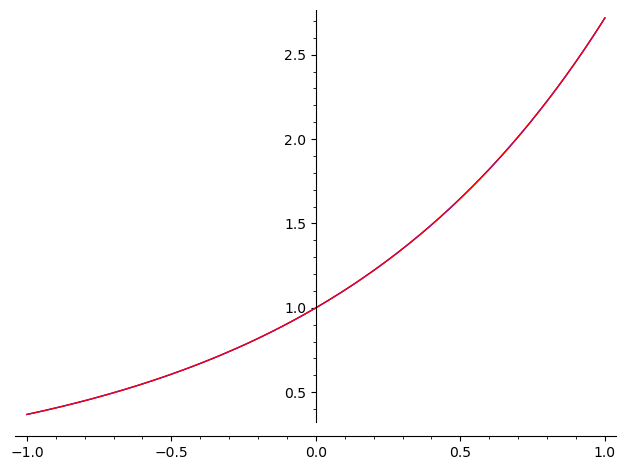

In [27]:
plot(e^x, (x,-1,1)) + plot(p_sol(x),(x,-1,1), color='red')

The graphs deviate quickly outside the interval:

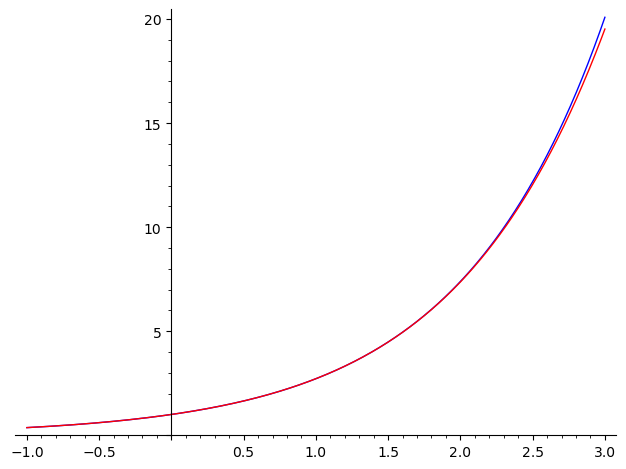

In [28]:
plot(e^x, (x,-1,3)) + plot(p_sol(x),(x,-1,3), color='red')

Let's see how close the graphs really are on the interval:

In [29]:
(e^1-p_sol(1)).full_simplify().n()

8.15836688677966e-6

In [30]:
f(x) = e^x-p_sol(x)
f

x |--> -3003/32*x^6*(3655*e^2 - 27007)*e^(-1) + 693/16*x^5*(329*e^2 - 2431)*e^(-1) + 3465/32*x^4*(4313*e^2 - 31869)*e^(-1) - 315/8*x^3*(401*e^2 - 2963)*e^(-1) - 2835/32*x^2*(1753*e^2 - 12953)*e^(-1) + 105/16*x*(513*e^2 - 3791)*e^(-1) + 35/32*(6733*e^2 - 49753)*e^(-1) + e^x

In [31]:
f(1).n()

8.15840166668025e-6

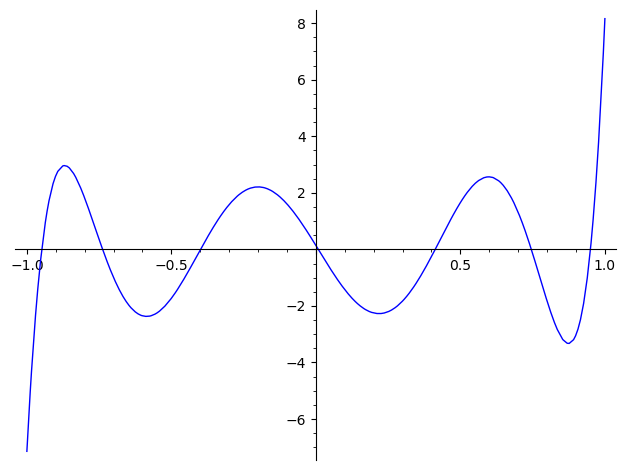

In [32]:
plot(f, (x,-1,1))

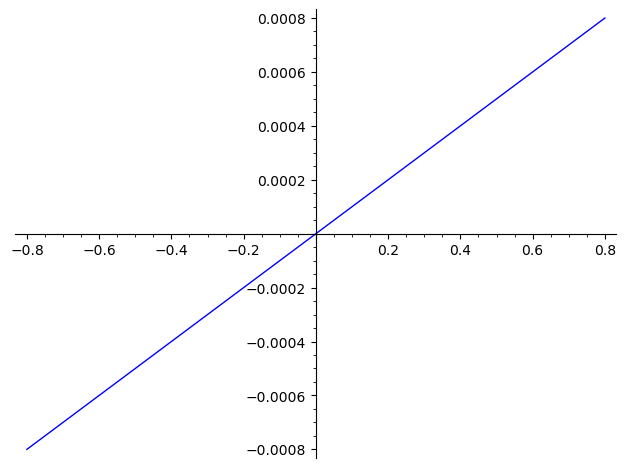

In [33]:
f(x)=10^-3*x
plot(f, (-8/10,8/10))

In [34]:
plot((e^x-p_sol(x)).full_simplify(), (x,-1,1), color='green')

An interact to view the two graphs:

In [35]:
@interact
def exp_approximate(d = slider(range(6), default=1)):
    c = [var(f"c{i}") for i in range(d+1)]
    p(x) = sum(c[i]*x^i for i in range(d+1))
    square_of_difference = (e^x - p(x))^2
    square_of_difference.expand()
    value = integrate(square_of_difference, (x, -1, 1))
    equations = [value.derivative(c[i]) == 0 for i in range(d+1)]
    solutions = solve(equations, c, solution_dict=True)
    sol = solutions[0]
    p_sol = p.substitute(sol)
    return plot(e^x, (x,-1,1)) + plot(p_sol(x),(x,-1,1), color='red')

Interactive function <function exp_approximate at 0x7fa9cc0fff60> with 1 widget
  d: SelectionSlider(description='d', index=1, options=(0, 1, 2, 3, 4, 5), value=1)

An interact to view the differences

Note adding frame to the plot below, because of a [current Sage bug](https://github.com/sagemath/sage/pull/37502).

In [36]:
@interact
def exp_approximate(d = slider(range(10), default=1)):
    c = [var(f"c{i}") for i in range(d+1)]
    p(x) = sum(c[i]*x^i for i in range(d+1))
    square_of_difference = (e^x - p(x))^2
    square_of_difference.expand()
    value = integrate(square_of_difference, (x, -1, 1))
    equations = [value.derivative(c[i]) == 0 for i in range(d+1)]
    solutions = solve(equations, c, solution_dict=True)
    sol = solutions[0]
    p_sol = p.substitute(sol)
    print(f'Integral is {value.subs(sol).n()}')
    return plot(e^x-p_sol(x), (x,-1,1), color='green', frame=True)

Interactive function <function exp_approximate at 0x7fa9bb69c180> with 1 widget
  d: SelectionSlider(description='d', index=1, options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=1)

### Vectors

We briefly review vector and vector spaces.

To create a vector from a list:

In [37]:
v = vector([1, sqrt(5), 2])
v

(1, sqrt(5), 2)

The base field is determined automatically from the values. Above we get a vector in Symbolic Ring. You can also specify the base field in construction. Here we use the field of algebraic reals:

In [38]:
v = vector(AA, [1, -sqrt(5), 2])

We discussed:

* Multiplication between vectors implements the dot product.
* You can compute the cross product with `v.cross_product(w)`.

The Euclidean norm (length) of a vector can be obtained with `v.norm()`.

In [39]:
v.norm()

3.162277660168380?

In [40]:
bool(v.norm() == sqrt(1^2 + 5 + 4))

True

For $p \in [1, +\infty)$, the $p$-norm of a vector $x \in {\mathbb R}^n$ is:
$$\|x\|_p = \left(\sum_{i=1}^n |x_i|^p\right)^{1/p}.$$
Special cases:

* The $1$-norm is $\sum_{i=1}^n |x_i|$.
* The $2$-norm is the usual Euclidean norm (the length of $x$).
* The $\infty$-norm is the absolute value of the entry with the largest absolute value. (This is also $\lim_{p \to +\infty} \|x\|_p$.)

We compute these with `v.norm(p)`:

In [41]:
bool(v.norm(1) == 1+sqrt(5)+2)

True

In [42]:
bool(v.norm(Infinity) == sqrt(5))

True

### Vector spaces and subspaces

We discussed vector spaces before as well. The following represents the vector space $\mathbb Q^3$:

In [43]:
V = VectorSpace(QQ, 3)
V

Vector space of dimension 3 over Rational Field

We can then construct a vector by passing `V` a list:

In [44]:
V([1, 6/7, -3/44])

(1, 6/7, -3/44)

Using a vector space, we can also get access to subspaces. A *subspace* of a vector is a subset that is also a vector space. (A subspace must contain zero, and be closed under scalar multiplication and addition.) One way to describe a vector space is as the *span* of some vectors. (Recall the *span* consists of all linear combinations.) For example:

In [45]:
v1 = V([   3,   0,    5])
v2 = V([  -2, 1/3,    4])
v3 = V([-9/2,   1, 29/2])
S = V.span([v1, v2, v3])
S

Vector space of degree 3 and dimension 2 over Rational Field
Basis matrix:
[  1   0 5/3]
[  0   1  22]

The above shows that the $3$ vectors only span a subspace of dimension $2$. Moreover, it gives a simplified basis for the subspace. You can get access to the vectors in this basis with:

In [46]:
S.basis()

[
(1, 0, 5/3),
(0, 1, 22)
]

Or to get the vectors:

In [47]:
b0, b1 = S.basis()
print(f'The basis cosists of {b0} and {b1}.')

The basis cosists of (1, 0, 5/3) and (0, 1, 22).


You can test membership in a subspace:

In [48]:
v2 in S

True

Any vector in $S$ has coordinates in terms of the basis. We can access them with:

In [49]:
S.coordinates(v2)

[-2, 1/3]

These record the coefficients of a linear combination of the basis that gives `v2`:

In [50]:
-2*b0 + 1/3*b1 == v2

True

Some other useful methods:

In [51]:
S.dimension()

2

In [52]:
S.codimension()

1

You can also construct elements of `S` by passing a vector. But, you get a `TypeError` if the resulting vector does not lie in the subspace:

In [53]:
try:
    S([1,2,3])
except Exception as e:
    print(repr(e))

TypeError('element [1, 2, 3] is not in free module')


You can also construct a subspace with a basis of your choice. Using the above:

In [54]:
S2 = V.subspace_with_basis([v1, v2])
S2

Vector space of degree 3 and dimension 2 over Rational Field
User basis matrix:
[  3   0   5]
[ -2 1/3   4]

Note that the basis now is $\{v_1, v_2\}$. 

In [55]:
S2.basis() == [v1, v2]

True

But S2 is the same as S as a subspace:

In [56]:
S==S2

True

The basis found above for `S` is the `echelonized_basis` for `S2`. This is a basis found by row reduction.

In [57]:
S2.echelonized_basis()

[
(1, 0, 5/3),
(0, 1, 22)
]

You can access the coordinates in either system:

In [58]:
S2.coordinates(v3)

[1/2, 3]

In [59]:
S2.echelon_coordinates(v3)

[-9/2, 1]

You can convert between the basis coordinates with an invertible matrix:

In [60]:
S2.user_to_echelon_matrix()

[  3   0]
[ -2 1/3]

In [61]:
S2.echelon_to_user_matrix()

[1/3   0]
[  2   3]

## Matrices

You can define a matrix by passing a list of lists of entries. Each inner list represents a row.

In [62]:
A = matrix([
    [ 1, 2, 3],
    [ 4, 5, 6],
])
A

[1 2 3]
[4 5 6]

In [63]:
show(A)

[1 2 3]
[4 5 6]

Matrices have a parent:

In [64]:
A.parent()

Full MatrixSpace of 2 by 3 dense matrices over Integer Ring

You can specify the base field or ring, just like for a vector:

In [65]:
A = matrix(QQ, [
    [ 1, 2, 3],
    [ 4, 5, 6],
])
A.parent()

Full MatrixSpace of 2 by 3 dense matrices over Rational Field

Some other constructors for matrices include: `identity_matrix`, `diagonal_matrix`, and `block_matrix`. I'll let you look up the documentation if you want to use them.

### Parents for matrices

The parent of a matrix is generally a `MatrixSpace`. 

In [66]:
M = MatrixSpace(AA, 2, 3)
M

Full MatrixSpace of 2 by 3 dense matrices over Algebraic Real Field

You can then construct a matrix in the space by passing a list:

In [67]:
M([
    [sqrt(2), 3^(1/3), sin(pi/7)],
    [      4,     5,     6^(1/6)],
])

[ 1.414213562373095?  1.442249570307409? 0.4338837391175582?]
[                  4                   5  1.348006154597278?]

Matrix spaces also give easy access to the zero matrix:

In [68]:
M.zero()

[0 0 0]
[0 0 0]

In [69]:
M.zero_matrix()

[0 0 0]
[0 0 0]

And the identity matrix (assuming the matrix space consists of square matrices):

In [70]:
M = MatrixSpace(RDF, 2, 2)
M.identity_matrix()

[1.0 0.0]
[0.0 1.0]

In the square case, you can also construct a diagonal matrix easily:

In [71]:
M.diagonal_matrix([2/3, 7])

[0.6666666666666666                0.0]
[               0.0                7.0]

Random matrices:

In [72]:
M.random_element()

[-0.7651742735644169  0.5191917068943019]
[-0.3848138427288086  0.8397104782181593]

### Solving matrix equations

In [73]:
A = matrix(QQ, [
    [ 1, 2, 3],
    [ 4, 5, 6],
])

In [74]:
b = vector(QQ, [1, 2])

Below we solve the equation $A x = b$, finding a single solution:

In [75]:
x0 = A.solve_right(b)

In [76]:
A*x0 == b

True

Note that right multiplication by $A$ gives a linear map $\mathbb R^3 \to \mathbb R^2$. The preimages of vectors are at least one dimensional, so there is more than one solution to $Ax=b$. The others differ from this one by elements in the &ldquo;right kernel,&rdquo; the set of solutions to $Ax=0$. We can compute this subspace of $\mathbb R^3$:

In [77]:
kernel = A.right_kernel()
kernel

Vector space of degree 3 and dimension 1 over Rational Field
Basis matrix:
[ 1 -2  1]

There is only one vector in the basis, we can obtain it as:

In [78]:
y = kernel.basis()[0]
y

(1, -2, 1)

Observe `Ay=0`:

In [79]:
A*y

(0, 0)

Then all the solutions of $Ax=b$ have the form $x = x_0+cy$ for some scalar $c$.

In [80]:
v = var('c')
A*(x0+c*y)

(1, 2)

You can also solve matrix equations. For example:

In [81]:
B = A.solve_right(identity_matrix(2))
B

[-5/3  2/3]
[ 4/3 -1/3]
[   0    0]

In [82]:
A*B

[1 0]
[0 1]

There are also corresponding methods for solving equations such as $xA=b$. Here $x$ and $b$ would be row-vectors. These are `solve_left` and `left_kernel`. In addition there is a `transpose` operation (which switches left and right):

In [83]:
A.transpose()

[1 4]
[2 5]
[3 6]

In [84]:
A.solve_left(vector([1,1,1]))

(-1/3, 1/3)

In [85]:
A.transpose().solve_right(vector([1,1,1]))

(-1/3, 1/3)

The kernel in this case is empty, so the above is the only solution.

In [86]:
A.left_kernel()

Vector space of degree 2 and dimension 0 over Rational Field
Basis matrix:
[]

In [87]:
A.transpose().right_kernel()

Vector space of degree 2 and dimension 0 over Rational Field
Basis matrix:
[]

### Image spaces

Left multiplication by an $m \times n$ matrix gives a linear map from $\mathbb R^n \to \mathbb R^m$. The image of this space is the *column space*, the span of the columns, and is a linear subspace of $\mathbb R^m$.

In [88]:
A

[1 2 3]
[4 5 6]

In [89]:
A.column_space()

Vector space of degree 2 and dimension 2 over Rational Field
Basis matrix:
[1 0]
[0 1]

In [90]:
A.column_space() == VectorSpace(QQ, 2)

True

So every vector can be written as a linear combination of the columns of $A$.

Similarly, the *row space* consists of linear combinations of the rows. This is the image under right multiplication, so if $A$ is $m \times n$, its row space is a subspace of $\mathbb R^n$.

In [91]:
A.row_space()

Vector space of degree 3 and dimension 2 over Rational Field
Basis matrix:
[ 1  0 -1]
[ 0  1  2]

### Matrix operations

If $A$ is $m \times n$ and $B$ is $n \times p$, then $C = A B$ is a $m \times p$ matrix.

In [92]:
A = matrix([
    [9,  0, -4, -1], 
    [1, -6, -3,  0]
])
B = matrix([
    [0, 7,  7], 
    [5, 3, -2], 
    [5, 8, -2], 
    [1, 8,  0]
])
C = A*B
C

[-21  23  71]
[-45 -35  25]

If the dimensions don't match up you get a `TypeError`.

In [93]:
try:
    A*C
except TypeError as e:
    print(repr(e))

TypeError("unsupported operand parent(s) for *: 'Full MatrixSpace of 2 by 4 dense matrices over Integer Ring' and 'Full MatrixSpace of 2 by 3 dense matrices over Integer Ring'")


Of course you can also **scalar multiply**:

In [94]:
2*A

[ 18   0  -8  -2]
[  2 -12  -6   0]

We already mentioned **transpose**:

In [95]:
A.transpose()

[ 9  1]
[ 0 -6]
[-4 -3]
[-1  0]

If a matrix is square, you can compute its determinant:

In [96]:
A = matrix([
    [-7, -5,  7],
    [ 6, -5, -5],
    [ 3, -2,  4]
])

In [97]:
A.det()

426

Recall that a square matrix is invertible if and only if its determinant is non-zero. The inverse of $A$ can be computed with:

In [98]:
A.inverse()

[  -5/71    1/71   10/71]
[-13/142 -49/426   7/426]
[  1/142 -29/426  65/426]

There is also the `~` unary operator (which is like negation but for multiplication):

In [99]:
~A

[  -5/71    1/71   10/71]
[-13/142 -49/426   7/426]
[  1/142 -29/426  65/426]

In [100]:
A * ~A

[1 0 0]
[0 1 0]
[0 0 1]

### Eigenvalues and eigenvectors

Recall from linear algebra that the eigenvalues of a matrix $A$ are roots of the characteristic polynomial $\lambda I-A$. You can get this characteristic polynomial (here written in terms of $x$ rather than $\lambda$):

In [101]:
A.characteristic_polynomial()

x^3 + 8*x^2 - 14*x - 426

Or by hand:

In [102]:
var('x')
(x*identity_matrix(3)-A).det().expand()

x^3 + 8*x^2 - 14*x - 426

You can get the eigenvalues of a square matrix with `.eigenvalues()`:

In [103]:
A.eigenvalues()

[6.031443488916664?, -7.015721744458332? - 4.627040833585011?*I, -7.015721744458332? + 4.627040833585011?*I]

In this case, we have one real algebraic root, and two complex conjugate algebraic roots.

There are both right and left eigenvectors for a matrix. Right eigenvectors solve $Av=\lambda v$, while left eigenvectors solve $wA=\lambda w$. The right eigenvectors can be obtained with:

In [104]:
l = A.right_eigenvectors()
l

[(6.031443488916664?, [(1, -0.2265426901628658?, 1.699818576871762?)], 1),
 (-7.015721744458332? - 4.627040833585011?*I,
  [(1, -0.2493017543337718? + 1.382972506362122?*I, -0.1803186451610273? + 0.3268316711750853?*I)],
  1),
 (-7.015721744458332? + 4.627040833585011?*I,
  [(1, -0.2493017543337718? - 1.382972506362122?*I, -0.1803186451610273? - 0.3268316711750853?*I)],
  1)]

**What was returned above?** Well it is a list of tuples. The first item in each tuple is an eigenvalue, the second is a list of corresponding eigenvectors, and the third is the algebraic multiplicity of the eigenvalue. The *algebraic multiplicity* is the is multiplicity of the eigenvalue as a root of the characteristic polynomial, i.e., $r$ has multiplicity $n$ if $(x-r)^n$ appears when the characteristic polynomial is factored. This multiplicity is an upperbound on the dimension of the eigenspace (solution space to the equation $Av=\lambda v$), and the list of eigenvectors provided is a basis for the eigenspace.

If we just want the real eigenvalue and eigenvector, we can do:

In [105]:
eigenvalue = l[0][0]
eigenvector = l[0][1][0]
print('The eigenvalue is {eigenvalue} and eigenvector is {eigenvector}.')
A*eigenvector == eigenvalue*eigenvector

The eigenvalue is {eigenvalue} and eigenvector is {eigenvector}.


True

A simple example where an eigenspace has dimension greater than one is:

In [106]:
A = diagonal_matrix([2,3,3])
A.right_eigenvectors()

[(2,
  [
  (1, 0, 0)
  ],
  1),
 (3,
  [
  (0, 1, 0),
  (0, 0, 1)
  ],
  2)]

You can also access the eigenspaces directly:

In [107]:
A.right_eigenspaces()

[
(2, Vector space of degree 3 and dimension 1 over Rational Field
User basis matrix:
[1 0 0]),
(3, Vector space of degree 3 and dimension 2 over Rational Field
User basis matrix:
[0 1 0]
[0 0 1])
]

### Diagonalization

A diagonalization of $A$ is a solution to the equation $P^{-1}AP=D,$ where $D$ is a diagonal matrix. In this case, the columns of $P$ are a linearly independent collection of eigenvectors while the diagonal matrix has the corresponding eigenvalues along the diagonal.

We demonstrate how to use the diagonalization method.

In [108]:
A = matrix(QQ, [
    [ -2,   2, 1/2],
    [  1,   1,  -2],
    [  2,  -2,  -1],
])
A

[ -2   2 1/2]
[  1   1  -2]
[  2  -2  -1]

You need to choose a field that contains the eigenvalues. We observe that the eigenvalues are all real and necessarily algebraic:

In [109]:
A.eigenvalues()

[-3.913581850565274?, -0.2375665064604065?, 2.151148357025681?]

So, we can diagonalize over `AA`, the field of algebraic reals. The diagonalization returns a pair of matrices `D` and `P`:

In [110]:
D,P = A.diagonalization(QQbar)
show('D =', D, ' and P =', P)

'D =' [ -3.913581850565274?                    0                    0]
[                   0 -0.2375665064604065?                    0]
[                   0                    0   2.151148357025681?] ' and P =' [  1.000000000000000?   1.000000000000000?   1.000000000000000?]
[ -0.670172497639164?  0.6549055933645964?   2.278424799011409?]
[ -1.146473710573896?  0.9052446136208015? -0.8114024819942746?]

We check the equation:

In [111]:
~P*A*P == D

True

Here is what we meant when we said the columns of $P$ are eigenvectors and the diagonal entries of $D$ are the corresponding eigenvalues:

In [112]:
for i in range(3):
    print( A*P.column(i) == D[i,i]*P.column(i) )

True
True
True


### Jordan Canonical Form:

Not all matrices can be diagonalized. For those that cannot, the Jordan Canonical Form is probably the closest thing. You can compute this with `A.jordan_form(Field)`.

In [113]:
A = matrix(QQ, [
    [  3,  -1,   0],
    [ -1, 3/2,   0],
    [ -1,  -2,   1],
])

In [114]:
show(A.jordan_form(QQ))

[7/2|  0   0]
[---+-------]
[  0|  1   1]
[  0|  0   1]

## Example: Pascal's theorem

Let $p_1, p_2, p_3, q_1, q_2, q_3$ be points in the projective plane. Then these are scalar equivalence classes of non-zero vectors. These points lie on a conic if and only if there are numbers $a,b,c,d,e,f$ not all zero such that 
$$a x^2 + b y^2 + c z^2 + d yz + e xz + f xy = 0.$$
whenever $(x,y,z)$ is a point representing any of the six points. (The set of points satisfying this equation is the *conic*.)

Pascal's theorem relates this condition to a construction involving points and lines. We define the additional points:
$$r_1 = \overline{p_2 q_3} \cap \overline{q_2 p_3}, \quad 
r_2 = \overline{p_3 q_1} \cap \overline{q_3 p_1}, \quad
r_3 = \overline{p_1 q_2} \cap \overline{q_1 p_2}.$$

**Pascal's Theorem:** The six points $p_1, p_2, p_3, q_1, q_2, q_3$ lie on a conic if and only if the three points $r_1$, $r_2$, and $r_3$ are colinear.

*Remark 1:* Formally Pascal's Theorem is the implication $\Rightarrow$. The other implication $\Leftarrow$ is called the Braikenridge–Maclaurin theorem.

*Remark 2:* The points $r_1$, $r_2$ and $r_3$ may not be well defined. For example, $r_1$ is not well-defined if $\overline{p_2 q_3} = \overline{q_2 p_3}$. If any of the $r_i$ are not well-defined then the three points should be considered to be colinear.

### Code to draw Pascal's Theorem:

In [115]:
@interact
def plot_curve(points = input_grid(2, 6, 
                                   default=[ [1,3,8,2,5, 9],
                                             [5,6,8,3,2, 2]], label=r'$P_1, P_2, P_3, Q_1, Q_2, Q_3$')):
    pts = []
    for i in range(6):
        pt = (points[0][i], points[1][i])
        pts.append(pt)
    pts

    # We plot the points below. (We set `zorder=10` so it appears on top.)
    plt1 = point(pts, color='red',zorder=10, size=20)
    text_args = dict(horizontal_alignment='right', vertical_alignment='bottom', color='red', zorder=10)
    plt1 += text(r'$P_1$', pts[0], **text_args)
    plt1 += text(r'$P_2$', pts[1], **text_args)
    plt1 += text(r'$P_3$', pts[2], **text_args)
    text_args = dict(horizontal_alignment='right', vertical_alignment='top', color='red', zorder=10)
    plt1 += text(r'$Q_1$', pts[3], **text_args)
    plt1 += text(r'$Q_2$', pts[4], **text_args)
    plt1 += text(r'$Q_3$', pts[5], **text_args)

    line_args = dict(zorder=9, color='green')
    plt1 += line([pts[1],pts[5]], **line_args)
    plt1 += line([pts[2],pts[4]], **line_args)
    plt1 += line([pts[2],pts[3]], **line_args)
    plt1 += line([pts[0],pts[5]], **line_args)
    plt1 += line([pts[0],pts[4]], **line_args)
    plt1 += line([pts[1],pts[3]], **line_args)

    p1 = vector([*pts[0], 1])
    p2 = vector([*pts[1], 1])
    p3 = vector([*pts[2], 1])
    q1 = vector([*pts[3], 1])
    q2 = vector([*pts[4], 1])
    q3 = vector([*pts[5], 1])
    r1 = p2.cross_product(q3).cross_product(p3.cross_product(q2))
    r2 = p3.cross_product(q1).cross_product(p1.cross_product(q3))
    r3 = p1.cross_product(q2).cross_product(p2.cross_product(q1))
    r1 /= r1[2]
    r2 /= r2[2]
    r3 /= r3[2]
    plt1 += point([r1[:2], r2[:2], r3[:2]], color='blue',zorder=10, size=20)


    text_args = dict(horizontal_alignment='right', vertical_alignment='top', color='blue', zorder=10)
    plt1 += text(r'$R_1$', r1[:2], **text_args)
    plt1 += text(r'$R_2$', r2[:2], **text_args)
    plt1 += text(r'$R_3$', r3[:2], **text_args)

    
    line_args = dict(zorder=9, color='lightblue')
    plt1 += line([r1[:2],r3[:2]], **line_args)
    
    # Now let us define a general version of the quadratic polynomial.
    a,b,c,d,e,f = var('a b c d e f')
    Q(x,y) = a*x^2 + b*x*y + c*x + d*y^2 + e*y + f

    # We get an equation that must hold from each point:
    eqns = [Q(*pts[i])==0 for i in range(5)]
    # We can solve the system:
    solutions = solve(eqns,[a,b,c,d,e,f], solution_dict=True)
    sol = solutions[0]
    # The following will extract all the variables and place them in a set:
    free_variables = set()
    for variable, expression in sol.items():
        free_variables = free_variables.union(expression.variables())
    free_variables

    # We want one solution, so we will choose values for these free variables.
    free_variable_values = {variable:1 for variable in free_variables}
    # Now let's build a new solution dictionary that substutes these free variables.
    new_sol = {}
    for variable, expression in sol.items():
        new_expression = expression.subs(free_variable_values)
        new_sol[variable] = new_expression
    new_sol

    # Great. Now we have an actual function to graph the zero set of:
    Q_new = Q.subs(new_sol)
    # We plot the zero contour below:
    plt2 = contour_plot(Q_new, (x, 0, 10), (y, 0, 10), fill=False, contours=[0])

    # Return the combined plot
    return plt1 + plt2

Interactive function <function plot_curve at 0x7fa9bb59df80> with 1 widget
  points: Grid(value=[[1, 3, 8, 2, 5, 9], [5, 6, 8, 3, 2, 2]], children=(Label(value='$P_1, P_2, P_3, Q_1, Q_2, Q_3$'), VBox(children=(EvalText(value='1', layout=Layout(max_width='5em')), EvalText(value='5', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='3', layout=Layout(max_width='5em')), EvalText(value='6', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='8', layout=Layout(max_width='5em')), EvalText(value='8', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='2', layout=Layout(max_width='5em')), EvalText(value='3', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='5', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em')))), VBox(children=(EvalText(value='9', layout=Layout(max_width='5em')), EvalText(value='2', layout=Layout(max_width='5em'))))))

### Proof of Pascal's Theorem

We will prove this symbolically. First, we write a function to produce a symbolic vector $(px,py,pz)$ from a string `p`.

In [116]:
def sym_vector(name):
    '''name should be a string.'''
    v = vector(SR, [var(f'{name}x'), var(f'{name}y'), var(f'{name}z')])
    return v

Here is a demonstration of the function above. Calling it with the argument `p1` produces a vector whose entries are `p1x`, `p1y`, and `p1z`:

In [117]:
p1 = sym_vector('p1')
p1

(p1x, p1y, p1z)

Here we construct our six points.

In [118]:
p1 = sym_vector('p1')
p2 = sym_vector('p2')
p3 = sym_vector('p3')
q1 = sym_vector('q1')
q2 = sym_vector('q2')
q3 = sym_vector('q3')
p1, p2, p3, q1, q2, q3

((p1x, p1y, p1z),
 (p2x, p2y, p2z),
 (p3x, p3y, p3z),
 (q1x, q1y, q1z),
 (q2x, q2y, q2z),
 (q3x, q3y, q3z))

Now we ask whether these six points lie on a conic of the form:
$$a x^2 + b y^2 + c z^2 + d yz + e xz + f xy = 0.$$
Note that each point $(x,y,z)$ gives rise to coefficients $(x^2, y^2, z^2, yz, xz, xy)$ of the variables $a$, $b$, $c$, $d$, $e$, and $f$ respectively. That is we require that the dot product
$$(x^2, y^2, z^2, yz, xz, xy) \cdot (a,b,c,d,e,f)=0$$
whenever $(x,y,z)$ is one of the points above.

In [119]:
def quadratic_coefficients(v):
    return vector([v[0]^2, v[1]^2, v[2]^2, v[1]*v[2], v[0]*v[2], v[0]*v[1]])

Here we construct a matrix where each row is $(x^2, y^2, z^2, yz, xz, xy)$ for a different one of our points:

In [120]:
A = matrix([quadratic_coefficients(v) for v in [p1, p2, p3, q1, q2, q3]])
A

[  p1x^2   p1y^2   p1z^2 p1y*p1z p1x*p1z p1x*p1y]
[  p2x^2   p2y^2   p2z^2 p2y*p2z p2x*p2z p2x*p2y]
[  p3x^2   p3y^2   p3z^2 p3y*p3z p3x*p3z p3x*p3y]
[  q1x^2   q1y^2   q1z^2 q1y*q1z q1x*q1z q1x*q1y]
[  q2x^2   q2y^2   q2z^2 q2y*q2z q2x*q2z q2x*q2y]
[  q3x^2   q3y^2   q3z^2 q3y*q3z q3x*q3z q3x*q3y]

Observe that the six points lie on a conic if and only if there is a non-zero vector $v$ such that $Av=0$. Recall that since $A$ is a square matrix, the equation $Av=0$ has a non-zero solution if and only if the determinant of $A$ is zero. We compute this value:

In [121]:
A_det = A.det().expand()

Printing `A_det` takes up many lines. But, it is easy to see from our expression for `A` that `A_det` is a degree 12 polynomial in the 18 coordinates. We have shown that the points lie on a conic if and only if this polynomial `A_det` is zero.

Now let us turn our attention to the construction of points. Recall that lines in the projective plane are planes in $\mathbb R^3$. We can represent these lines as normal vectors. A common normal to two vectors $v$ and $w$ is given by the cross product $v \times w$. 

In the other direction, if you have two normal vectors to two planes, $n_1$ and $n_2$, then a vector contained in the intersection of the two planes is given by $n_1 \times n_2$. Therefore, coordinates for the points
$$r_1 = \overline{p_2 q_3} \cap \overline{q_2 p_3}, \quad 
r_2 = \overline{p_3 q_1} \cap \overline{q_3 p_1}, \quad
r_3 = \overline{p_1 q_2} \cap \overline{q_1 p_2}$$
are obtained as:

In [122]:
r1 = p2.cross_product(q3).cross_product(p3.cross_product(q2))
r2 = p3.cross_product(q1).cross_product(p1.cross_product(q3))
r3 = p1.cross_product(q2).cross_product(p2.cross_product(q1))

The coefficents of each of these are a degree four polynomials. We print them below:

In [123]:
print(f'r1 = {r1}')
print(f'r2 = {r2}')
print(f'r3 = {r3}')

r1 = ((p3z*q2x - p3x*q2z)*(p2y*q3x - p2x*q3y) - (p3y*q2x - p3x*q2y)*(p2z*q3x - p2x*q3z), (p3z*q2y - p3y*q2z)*(p2y*q3x - p2x*q3y) - (p3y*q2x - p3x*q2y)*(p2z*q3y - p2y*q3z), (p3z*q2y - p3y*q2z)*(p2z*q3x - p2x*q3z) - (p3z*q2x - p3x*q2z)*(p2z*q3y - p2y*q3z))
r2 = (-(p3z*q1x - p3x*q1z)*(p1y*q3x - p1x*q3y) + (p3y*q1x - p3x*q1y)*(p1z*q3x - p1x*q3z), -(p3z*q1y - p3y*q1z)*(p1y*q3x - p1x*q3y) + (p3y*q1x - p3x*q1y)*(p1z*q3y - p1y*q3z), -(p3z*q1y - p3y*q1z)*(p1z*q3x - p1x*q3z) + (p3z*q1x - p3x*q1z)*(p1z*q3y - p1y*q3z))
r3 = ((p2z*q1x - p2x*q1z)*(p1y*q2x - p1x*q2y) - (p2y*q1x - p2x*q1y)*(p1z*q2x - p1x*q2z), (p2z*q1y - p2y*q1z)*(p1y*q2x - p1x*q2y) - (p2y*q1x - p2x*q1y)*(p1z*q2y - p1y*q2z), (p2z*q1y - p2y*q1z)*(p1z*q2x - p1x*q2z) - (p2z*q1x - p2x*q1z)*(p1z*q2y - p1y*q2z))


Now we need to decide when these three points lie in a common line in the Projective plane. This is equivalent to the three vectors above being linearly dependent. This is in turn equivalent to the matrix $B$ with rows `r1`, `r2` and `r3` having determineant zero. We compute the matrix $B$ and its determinant below.

In [124]:
B = matrix([r1, r2, r3])
B_det = B.det().expand()

We have shown that $r_1$, $r_2$, and $r_3$ are colinear if and only if `B_det == 0`.

So, to prove our version of Pascal's Theorem, we must show `A_det == 0` if and only if `B_det == 0`. But in fact we have `A_det == B_det`:

In [125]:
A_det - B_det

0